# Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to the Ames Housing data

Let's import our Ames Housing data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

## Look at the histograms for the continuous variables

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. A heuristic you might use to select continous variables might be a combination of features that are not object datatypes and have at least a certain amount of unique values.

In [2]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
ames.dtypes == 'int64'

Id                True
MSSubClass        True
MSZoning         False
LotFrontage      False
LotArea           True
                 ...  
MoSold            True
YrSold            True
SaleType         False
SaleCondition    False
SalePrice         True
Length: 81, dtype: bool

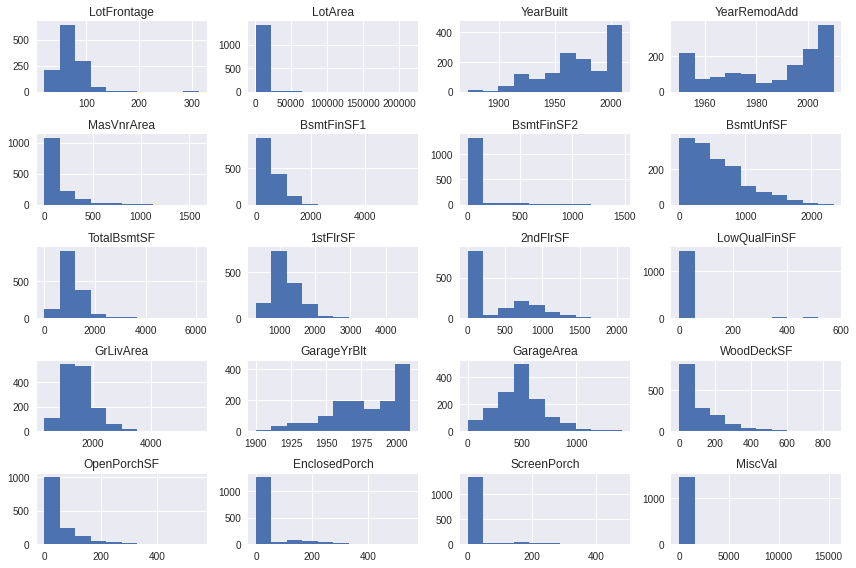

In [78]:
# Your code here
ames_cont = ames.loc[:,((ames.dtypes == 'int64') | (ames.dtypes == 'float'))]
ames_cont = ames_cont.loc[:,(ames_cont.nunique() > 20)]
continuous_cols = [x for x in ames_cont.columns if x != 'Id']

# for col in ames.columns:
#     #print(ames[col].dtype)
#     if ames[col].dtype == 'int64' or ames[col].dtype == 'float':
#         if ames[col].nunique() > 20 and col != 'Id':
#             continuous_cols.append(col)
#ames_cont = ames[continuous_cols]

fig, axs = plt.subplots(5,4, figsize=(12,8))
for col, ax in zip(continuous_cols, axs.flatten()):
    ames[col].hist(ax=ax)
    ax.set_title(col)
    
fig.tight_layout()

We can see from our histogram of the contiuous features that there are many examples where there are a ton of zeros. For example, WoodDeckSF (square footage of a wood deck) gives us a positive number indicating the size of the deck and zero if no deck exists. It might have made sense to categorize this variable to "deck exists or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

Lets drop these zero-inflated variables for now and select the features which don't have this characteristic.

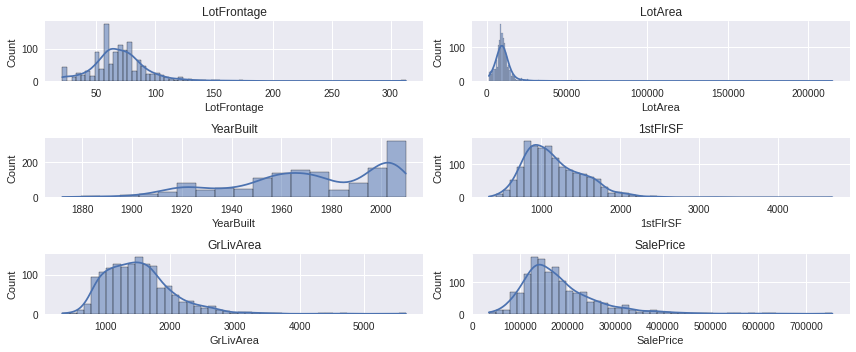

In [79]:
# Select non zero-inflated continuous features as ames_cont
import seaborn as sns

selected = ['LotFrontage', 'LotArea', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'SalePrice']
ames_cont = ames_cont[selected]

fig, axs = plt.subplots(len(selected)//2,2, figsize=(12,5))
for col, ax in zip(selected, axs.flatten()):
    sns.histplot(data=ames_cont[col], ax=ax, kde=True)
    ax.set_title(col)
    
fig.tight_layout()

## Perform log transformations for the variables where it makes sense

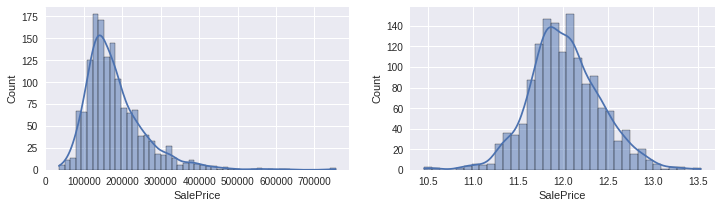

In [48]:
# Your code here
import numpy as np
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
sns.histplot(data=ames_cont['SalePrice'], kde=True, ax=ax1)
sns.histplot(data=np.log(ames_cont['SalePrice']), kde=True, ax=ax2)
ames_cont['SalePrice'] = np.log(ames_cont['SalePrice'])

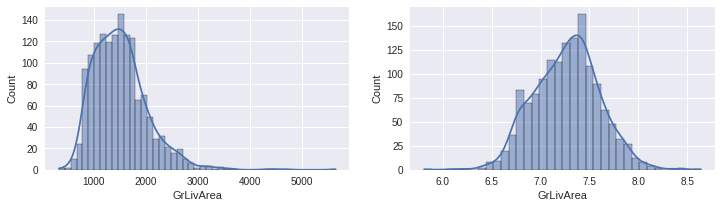

In [52]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
sns.histplot(data=ames_cont['GrLivArea'], kde=True, ax=ax1)
sns.histplot(data=np.log(ames_cont['GrLivArea']), kde=True, ax=ax2)
ames_cont['GrLivArea'] = np.log(ames_cont['GrLivArea'])

<ipython-input-56-d4c4121ab7fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ames_cont['LotFrontage'] = np.log(ames_cont['LotFrontage'])


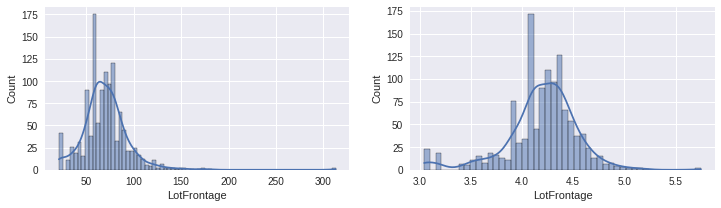

In [56]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,3))
sns.histplot(data=ames_cont['LotFrontage'], kde=True, ax=ax1)
sns.histplot(data=np.log(ames_cont['LotFrontage']), kde=True, ax=ax2)
ames_cont['LotFrontage'] = np.log(ames_cont['LotFrontage'])

## Standardize the continuous variables

Store your final features in a DataFrame `features_final`: 

In [59]:
# Your code here
ames_cont.head()


,LotFrontage,YearBuilt,GrLivArea,SalePrice
0,4.174387,2003,7.444249,12.247694
1,4.382027,1976,7.140453,12.109011
2,4.219508,2001,7.487734,12.317167
3,4.094345,1915,7.448334,11.849398
4,4.430817,2000,7.695303,12.429216


In [62]:
#LotFrontage MinMax
ames_cont['LotFrontage'] =       ((ames_cont['LotFrontage'] 
                                  - ames_cont['LotFrontage'].min()) 
                                 / (ames_cont['LotFrontage'].max() 
                                  - ames_cont['LotFrontage'].min()))

In [67]:
ames_cont['SalePrice'] =       ((ames_cont['SalePrice'] 
                                  - ames_cont['SalePrice'].min()) 
                                 / (ames_cont['SalePrice'].max() 
                                  - ames_cont['SalePrice'].min()))

In [65]:
#LotFrontage MeanNormal (just for practice)
ames_cont['GrLivArea'] = (  (ames_cont['GrLivArea']
                             - ames_cont['GrLivArea'].mean())
                          / (ames_cont['GrLivArea'].max()
                             - ames_cont['GrLivArea'].mean()))

In [68]:
ames_cont.head()

,LotFrontage,YearBuilt,GrLivArea,SalePrice
0,0.418208,2003,0.128793,0.581431
1,0.495064,1976,-0.092920,0.536319
2,0.434909,2001,0.160529,0.604029
3,0.388581,1915,0.131774,0.451871
4,0.513123,2000,0.312015,0.640477


## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!